# Symbolic Regression

In this lecture we study symbolic regression, which is a method for finding a symbolic expression that fits a given data set.

### $ F \propto 1/r^2$

In [1]:
import os
os.environ['PYTHON_JULIACALL_HANDLE_SIGNALS'] = 'yes'
os.environ['JULIA_PYTHONCALL_EXE'] = '@PyCall'

In [2]:
import torchvision, torch, numpy 

torch.__version__, numpy.__version__, torchvision.__version__

('2.7.0', '2.3.2', '0.22.0')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

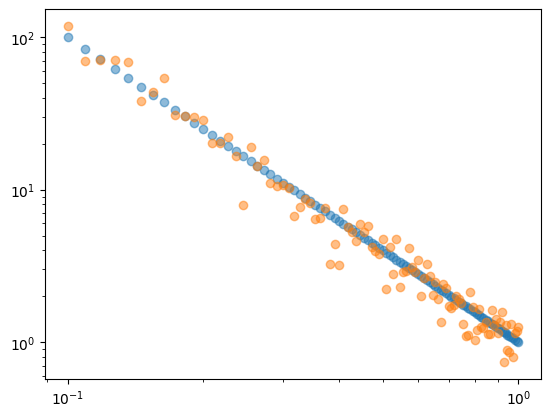

In [4]:
rs = np.linspace(.1, 1, 100)
Fs = 1/rs**2
rs = rs.reshape(rs.shape[0], 1)
# noise_with_Fs_dependent_variance = np.random.normal(0, 1/rs, Fs.shape)
noised_Fs = Fs + np.random.normal(0, .2*Fs, Fs.shape)
plt.scatter(rs, Fs, label='F', alpha=.5)
plt.scatter(rs, noised_Fs, label='noised_F', alpha=.5)
plt.xscale('log')
plt.yscale('log')

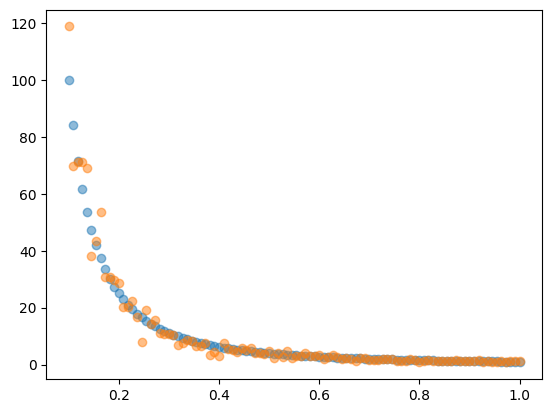

In [5]:
plt.scatter(rs, Fs, label='F', alpha=.5)
plt.scatter(rs, noised_Fs, label='noised_F', alpha=.5)

In [6]:
# !pip3 install -U pysr
# !python3 -m pysr install

In [7]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    verbosity=0,  # This reduces output and may help avoid the UTF-8 issue
    # ^ Custom loss function (julia syntax)
)

/opt/anaconda3/envs/kan/lib/python3.13/site-packages/juliacall/__init__.py:61: UserWarning: torch was imported before juliacall. This may cause a segfault. To avoid this, import juliacall before importing torch. For updates, see https://github.com/pytorch/pytorch/issues/78829.
  warnings.warn(


Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


/opt/anaconda3/envs/kan/lib/python3.13/site-packages/pysr/sr.py:1036: FutureWarning: `loss` has been renamed to `elementwise_loss` in PySRRegressor. Please use that instead.
  warnings.warn(


Let's try this first on Fs.

In [8]:
model.fit(rs, Fs)
model.get_best()

/opt/anaconda3/envs/kan/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


complexity                                                    9
loss                                                        0.0
equation                inv((x0 * 3.6159516e-8) + x0) * inv(x0)
score                                                  0.249658
sympy_format                      1/(x0*(x0*3.6159516e-8 + x0))
lambda_format    PySRFunction(X=>1/(x0*(x0*3.6159516e-8 + x0)))
Name: 5, dtype: object

Very clean. Exactly as expected.


In [9]:
model.fit(rs, noised_Fs)

/opt/anaconda3/envs/kan/lib/python3.13/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/anaconda3/envs/kan/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


,model_selection,'best'
,binary_operators,"['+', '*']"
,unary_operators,"['cos', 'exp', ...]"
,expression_spec,None
,niterations,40
,populations,31
,population_size,27
,max_evals,None
,maxsize,30
,maxdepth,None
,warmup_maxsize_by,None


In [10]:
model.get_best()

complexity                                                      18
loss                                                      5.361372
equation         ((inv(x0) + -1.8216194) * ((inv(x0) + (cos(x0 ...
score                                                     0.129011
sympy_format     (-1.8216194 + 1/x0)*(cos(x0*(-193.12636))*1.87...
lambda_format    PySRFunction(X=>(-1.8216194 + 1/x0)*(cos(x0*(-...
Name: 15, dtype: object

In [11]:

model.get_hof()

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,364.227080,10.585251,0.000000,10.5852510000000,PySRFunction(X=>10.5852510000000)
1,2,362.752530,inv(x0),0.004057,1/x0,PySRFunction(X=>1/x0)
2,3,362.238950,inv(sin(x0)),0.001417,1/sin(x0),PySRFunction(X=>1/sin(x0))
3,4,14.305650,inv(x0 * x0),3.231650,x0**(-2),PySRFunction(X=>x0**(-2))
4,5,14.282256,inv(x0 * sin(x0)),0.001637,1/(x0*sin(x0)),PySRFunction(X=>1/(x0*sin(x0)))
5,6,12.958497,inv((x0 * x0) + -0.00070652785),0.097266,1/(x0*x0 - 0.00070652785),PySRFunction(X=>1/(x0*x0 - 0.00070652785))
6,8,12.936524,inv((x0 + -0.0070212334) * x0) + -0.27081856,0.000849,-0.27081856 + 1/(x0*(x0 - 0.0070212334)),PySRFunction(X=>-0.27081856 + 1/(x0*(x0 - 0.00...
7,9,12.921853,(inv(x0) + -0.121334516) * inv(x0 + -0.008211043),0.001135,(-0.121334516 + 1/x0)/(x0 - 0.008211043),PySRFunction(X=>(-0.121334516 + 1/x0)/(x0 - 0....
8,10,8.108215,(cos(x0 * -192.28917) + inv(x0)) * inv(x0),0.466042,(cos(x0*(-192.28917)) + 1/x0)/x0,PySRFunction(X=>(cos(x0*(-192.28917)) + 1/x0)/x0)
9,11,7.944504,inv(x0) * (cos(sin(x0) * -192.9756) + inv(x0)),0.020397,(cos(sin(x0)*(-192.9756)) + 1/x0)/x0,PySRFunction(X=>(cos(sin(x0)*(-192.9756)) + 1/...


OK, so it may or may not have worked again, depending on the seed. But presumably if we added TOO much noise, it would fail eventually.

/opt/anaconda3/envs/kan/lib/python3.13/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/opt/anaconda3/envs/kan/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


,model_selection,'best'
,binary_operators,"['+', '*']"
,unary_operators,"['cos', 'exp', ...]"
,expression_spec,None
,niterations,40
,populations,31
,population_size,27
,max_evals,None
,maxsize,30
,maxdepth,None
,warmup_maxsize_by,None


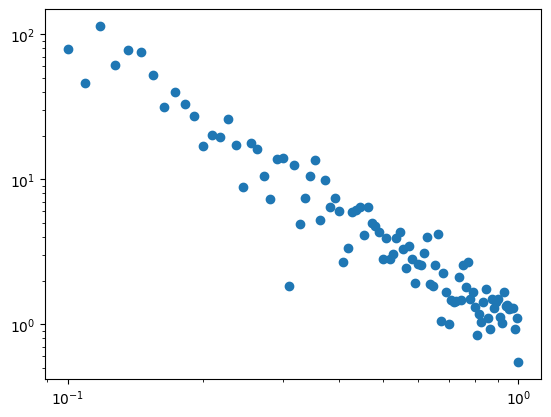

In [12]:
noised_Fs = Fs + np.random.normal(0, .3*Fs, Fs.shape)
plt.scatter(rs, noised_Fs)
plt.xscale('log')
plt.yscale('log')

model.fit(rs, noised_Fs)

In [13]:
# plot model hall of fame

model.get_hof()

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,373.514650,10.726567,0.000000,10.7265670000000,PySRFunction(X=>10.7265670000000)
1,4,57.234863,inv(x0 * x0),0.625265,x0**(-2),PySRFunction(X=>x0**(-2))
2,5,57.163887,inv(x0 * sin(x0)),0.001241,1/(x0*sin(x0)),PySRFunction(X=>1/(x0*sin(x0)))
3,6,50.089590,exp((x0 + -0.51678413) * -10.829477),0.132109,exp((x0 - 0.51678413)*(-10.829477)),PySRFunction(X=>exp((x0 - 0.51678413)*(-10.829...
4,7,49.953407,exp((sin(x0) + -0.51678413) * -10.829477),0.002722,exp((sin(x0) - 0.51678413)*(-10.829477)),PySRFunction(X=>exp((sin(x0) - 0.51678413)*(-1...
5,8,47.260345,exp((x0 * -11.58442) + 5.628698) + 1.9803207,0.055419,exp(5.628698 + x0*(-11.58442)) + 1.9803207,PySRFunction(X=>exp(5.628698 + x0*(-11.58442))...
6,11,43.505993,(sin(inv(sin(inv(x0)))) + inv(x0)) * inv(x0),0.027591,(sin(1/sin(1/x0)) + 1/x0)/x0,PySRFunction(X=>(sin(1/sin(1/x0)) + 1/x0)/x0)
7,12,41.886753,inv(x0) * (sin(inv(sin(inv(sin(x0))))) + inv(x0)),0.037929,(sin(1/sin(1/sin(x0))) + 1/x0)/x0,PySRFunction(X=>(sin(1/sin(1/sin(x0))) + 1/x0)...
8,13,38.214214,inv(x0) * (inv(x0) + sin(inv(sin(inv(x0) + 1.1...,0.091762,(sin(1/sin(1.1670352 + 1/x0)) + 1/x0)/x0,PySRFunction(X=>(sin(1/sin(1.1670352 + 1/x0)) ...
9,14,37.438988,(inv(x0) + sin(inv(sin(sin(inv(x0) + 0.3291384...,0.020495,(sin(1/sin(sin(0.32913846 + 1/x0))) + 1/x0)/x0,PySRFunction(X=>(sin(1/sin(sin(0.32913846 + 1/...


Notice the stratification in the loss. It starts very high, but then gets much lower by the time we get to 1/x^2. This shows we're not getting a lot more beyond the 1/x^2, so balancing complexity and loss, this is the best model.

### Damped Harmonic Oscillator

In [14]:
import numpy as np
num_samples = 100
time_end = 5
times = np.linspace(0, time_end, num_samples)
x_data = np.array([ 1.42136407e+00,  1.32538052e+00,  1.08997205e+00,  4.01375320e-01,
       -1.78495795e-01, -8.50696683e-01, -1.18615104e+00, -1.42918430e+00,
       -1.08653056e+00, -5.51030603e-01, -7.50736710e-02,  6.47062767e-01,
        1.01484947e+00,  1.23909135e+00,  1.16973363e+00,  7.14521669e-01,
        3.55287429e-01, -2.95169206e-01, -9.74425168e-01, -1.16492314e+00,
       -9.52631079e-01, -7.77656938e-01, -3.28057458e-01,  2.92744065e-01,
        6.01953380e-01,  8.65371671e-01,  9.54240091e-01,  7.08483475e-01,
        4.68455172e-01, -1.56245101e-01, -3.70602686e-01, -8.30733462e-01,
       -8.95167164e-01, -8.91137955e-01, -4.18014142e-01, -2.22376053e-01,
        4.10047775e-01,  6.88406843e-01,  1.04061990e+00,  7.30025281e-01,
        3.90618018e-01,  1.43181366e-01, -2.20778546e-01, -4.53298514e-01,
       -7.87562022e-01, -7.21285197e-01, -6.27664217e-01, -4.65873073e-01,
        4.76786963e-02,  3.89328316e-01,  5.92877625e-01,  6.37519856e-01,
        4.83785342e-01,  1.71821980e-01,  5.43082539e-02, -3.29509591e-01,
       -4.12974420e-01, -5.53475010e-01, -5.83206553e-01, -4.58252882e-01,
       -5.48980467e-02,  2.26195369e-01,  4.52451610e-01,  5.38430311e-01,
        3.67845822e-01,  3.97176254e-01,  1.84432283e-01, -1.49708735e-01,
       -5.37683940e-01, -3.88877197e-01, -6.79843289e-01, -4.05592818e-01,
       -2.06048677e-01, -3.04612159e-02,  2.73534969e-01,  2.33194682e-01,
        4.87619039e-01,  3.34767833e-01,  3.00019677e-01,  9.12268252e-03,
       -1.21252257e-01, -2.57336778e-01, -4.68953016e-01, -5.12673830e-01,
       -2.89839003e-02, -3.22855227e-01,  5.86021068e-02,  8.32512072e-02,
        2.60554538e-01,  3.23171785e-01,  4.29277758e-01,  8.75180664e-02,
       -1.17562189e-03, -5.57391100e-02, -2.43060644e-01, -3.07899430e-01,
       -1.78936431e-01, -2.53676100e-01, -9.54204646e-02,  2.55114941e-01])
x_data = x_data.reshape(x_data.shape[0], 1)
times = times.reshape(times.shape[0], 1)

In [15]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=500,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    verbosity=0
    # ^ Custom loss function (julia syntax)
)

/opt/anaconda3/envs/kan/lib/python3.13/site-packages/pysr/sr.py:1036: FutureWarning: `loss` has been renamed to `elementwise_loss` in PySRRegressor. Please use that instead.
  warnings.warn(


In [16]:
model.fit(times, x_data)

/opt/anaconda3/envs/kan/lib/python3.13/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


,model_selection,'best'
,binary_operators,"['+', '*']"
,unary_operators,"['cos', 'exp', ...]"
,expression_spec,None
,niterations,500
,populations,31
,population_size,27
,max_evals,None
,maxsize,30
,maxdepth,None
,warmup_maxsize_by,None


In [17]:
print(model.get_best())
model.get_hof()

complexity                                                      12
loss                                                      0.009748
equation         sin((x0 + 2.6754918) * 9.87697) * ((x0 * -0.23...
score                                                      0.63551
sympy_format     (1.3419908 + x0*(-0.23573427))*sin((x0 + 2.675...
lambda_format    PySRFunction(X=>(1.3419908 + x0*(-0.23573427))...
Name: 10, dtype: object


,complexity,loss,equation,score,sympy_format,lambda_format
0,1,0.360228,-0.00198704,0.000000,-0.00198704000000000,PySRFunction(X=>-0.00198704000000000)
1,3,0.359759,x0 * -0.007516606,0.000651,x0*(-0.007516606),PySRFunction(X=>x0*(-0.007516606))
2,4,0.106737,cos(x0 * -9.781544),1.215067,cos(x0*(-9.781544)),PySRFunction(X=>cos(x0*(-9.781544)))
3,5,0.085797,sin(cos(x0 * 9.7802305)),0.218382,sin(cos(x0*9.7802305)),PySRFunction(X=>sin(cos(x0*9.7802305)))
4,6,0.076663,cos(x0 * -9.779522) * 0.75425094,0.112562,cos(x0*(-9.779522))*0.75425094,PySRFunction(X=>cos(x0*(-9.779522))*0.75425094)
5,7,0.076615,sin(sin((x0 + 2.6759079) * 9.874695)),0.000638,sin(sin((x0 + 2.6759079)*9.874695)),PySRFunction(X=>sin(sin((x0 + 2.6759079)*9.874...
6,8,0.068545,sin((x0 + 0.76682353) * 9.875645) * 0.76413184,0.111297,sin((x0 + 0.76682353)*9.875645)*0.76413184,PySRFunction(X=>sin((x0 + 0.76682353)*9.875645...
7,9,0.029550,cos(x0 * -9.759643) * cos(x0 * 0.28452548),0.841407,cos(x0*(-9.759643))*cos(x0*0.28452548),PySRFunction(X=>cos(x0*(-9.759643))*cos(x0*0.2...
8,10,0.019758,cos(x0 * -9.755005) * ((x0 * -0.23382014) + 1....,0.402523,(1.3299398 + x0*(-0.23382014))*cos(x0*(-9.7550...,PySRFunction(X=>(1.3299398 + x0*(-0.23382014))...
9,11,0.018404,(cos(x0 * -9.757031) * exp(x0 * -0.3170593)) *...,0.070983,cos(x0*(-9.757031))*exp(x0*(-0.3170593))*1.486382,PySRFunction(X=>cos(x0*(-9.757031))*exp(x0*(-0...


In [18]:
best = model.get_best()

In [19]:
best.equation

'sin((x0 + 2.6754918) * 9.87697) * ((x0 * -0.23573427) + 1.3419908)'

A * np.exp(-beta * times) * np.cos(omega * times - delta)

A_true = 1.4

beta_true = 0.3

omega_true = np.pi**2 

delta_true = 0.3

In [20]:
np.pi**2

9.869604401089358

# Topological Data Analysis

Now we study topological data analysis. The essential question is, if your experiments or simulations sampled a manifold with non-trivial topology, how would you know it from a finite number of samples?

In the figure below at small values of r, we simply see a collection of points. But they're clearly arranged in a way that makes it looks like they're sampled from either a collection of circles, or a cylinder -- it's not simply a connection of point. As we increase $r$, which in this video is simply the marker size, eventually everything overlaps and it's one big blob. Intuitively, that is also not the lesson that we're supposed to take away from the data.

In [21]:
from IPython.display import Image
Image(url='videos/PH.gif')


Roughly, a non-trivial $k$-cycle in a space is a $k$-dimensional subspace without boundary that is not the boundary of a $(k+1)$-dimensional subspace. For example, a torus has two one-cycles, which are the two circles that go around the torus. A two-sphere has no one-cycles, but it has a two-cycle, which is the entire sphere. Given a topological space, the dimensionality of the $k$-cycles is given by the so-called Betti numbers.

The basic idea in persistent homology is to study how the Betti numbers change as a function of a so-called filtration parameter, $r$. 

In slightly more detail, to any value of $r$ we may associate a so-called Vietoris-Rips simplicial complex. Recall that a $k$-simplex is a $k$-dimensional subspace. A simplicial complex is a collection of simplices that is closed under taking subspaces. The Vietoris-Rips complex is the simplicial complex that is generated by the points in the data set, where we include a $k$-simplex if all of its vertices are within distance $r$ of each other. We see that it is clearly closed under taking subspaces because if we have a $k$-simplex, then all of its vertices are within distance $r$ of each other, and so are all of the vertices of any subspace of the $k$-simplex.

We will be using the `ripser` package. The basic idea is that we can study the topology of a data set by looking at the persistence of the homology of the Vietoris-Rips complex of the data set.

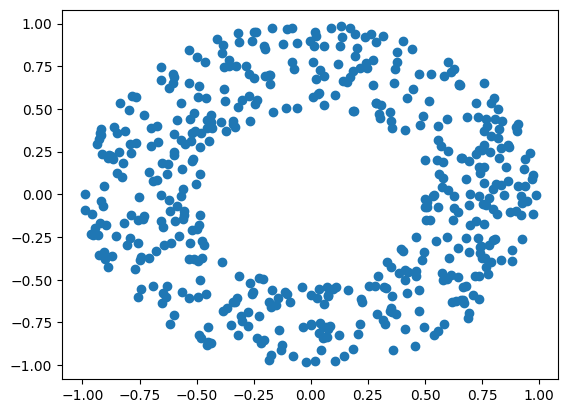

In [22]:
num_samples = 500

def sample_from_annulus(num_samples, lower_radius = .5, upper_radius = 1):
    samples_from_unit_disk = np.random.uniform(-upper_radius, upper_radius, (1000*num_samples, 2))
    samples_from_unit_disk = samples_from_unit_disk[np.linalg.norm(samples_from_unit_disk, axis=1) < upper_radius]
    samples_from_annulus = samples_from_unit_disk[np.linalg.norm(samples_from_unit_disk, axis=1) > lower_radius]
    samples_from_annulus = samples_from_annulus[:num_samples]
    assert len(samples_from_annulus) == num_samples
    return samples_from_annulus
    
samps = sample_from_annulus(num_samples)

plt.scatter(samps[:, 0], samps[:, 1])



(np.float64(-1.0910105587447816),
 np.float64(1.078180786896837),
 np.float64(-1.092872002143245),
 np.float64(1.0825524857534654))

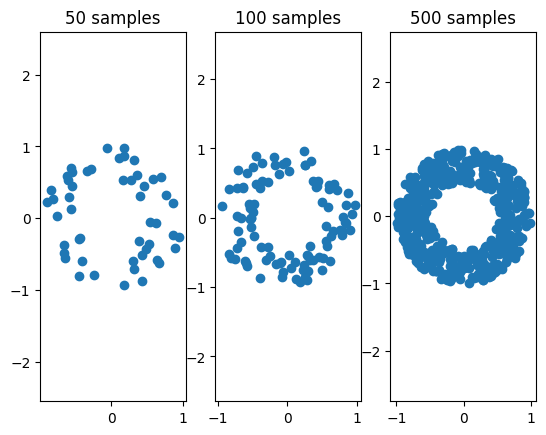

In [23]:
# three plots of annulus samples with 50, 100, 500 points, respectively
# put them in a row

plt.subplot(1, 3, 1)
samps = sample_from_annulus(50)
plt.ylim(-1,1)
plt.scatter(samps[:, 0], samps[:, 1])
plt.title('50 samples')
plt.axis('equal')
plt.subplot(1, 3, 2)
samps = sample_from_annulus(100)
plt.ylim(-1,1)
plt.scatter(samps[:, 0], samps[:, 1])
plt.title('100 samples')
plt.axis('equal')
plt.subplot(1, 3, 3)
samps = sample_from_annulus(500)
plt.ylim(-1,1)
plt.scatter(samps[:, 0], samps[:, 1])
plt.title('500 samples')
plt.axis('equal')

# set aspect ratios equal



In [24]:
!pip install ripser
!pip install persim

In [25]:
from ripser import ripser
from persim import plot_diagrams

data = ripser(samps)
diagrams = data['dgms']


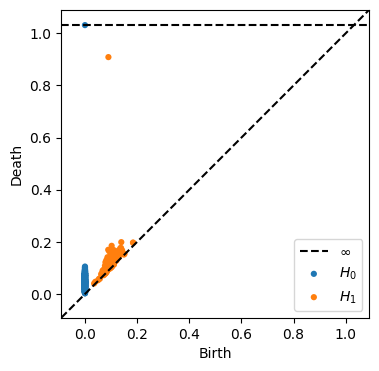

In [26]:
plt.figure(figsize=(8, 4))
plot_diagrams(diagrams, show=True)


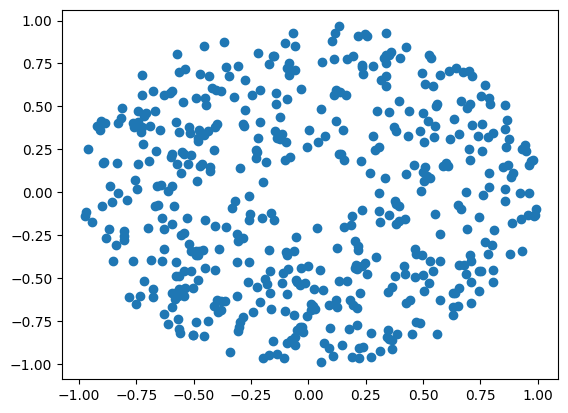

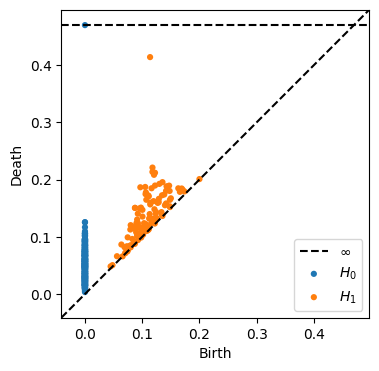

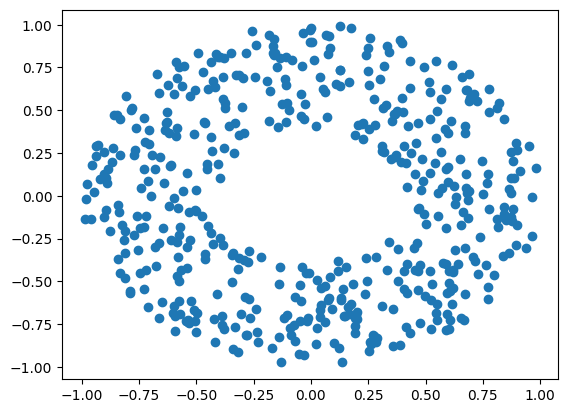

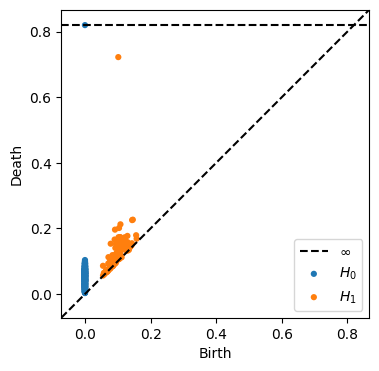

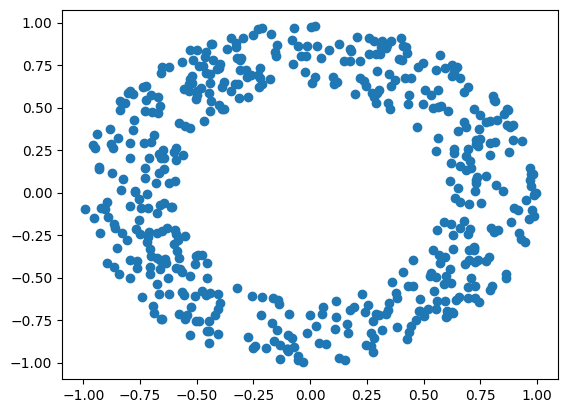

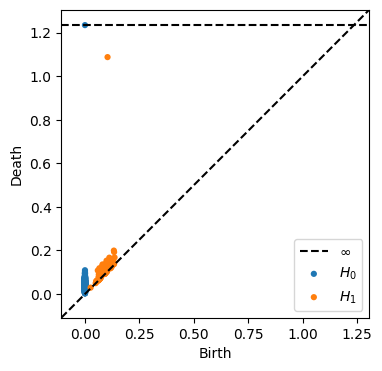

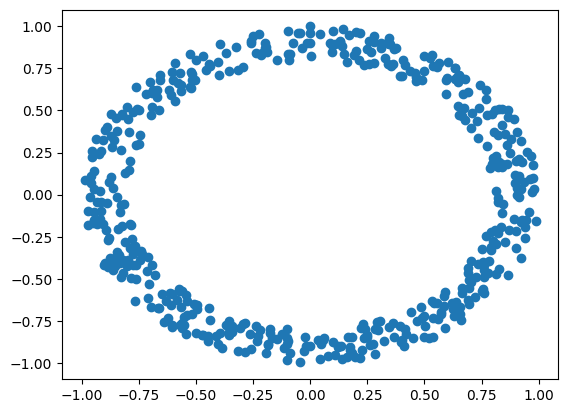

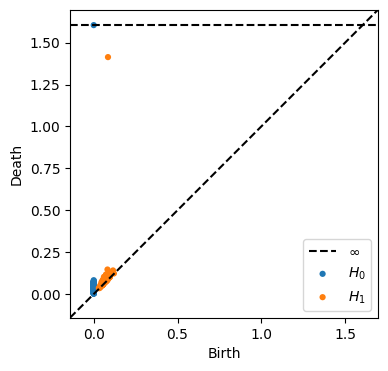

In [27]:
for lower_radius in [0.2, 0.4, 0.6, 0.8]:
    samps = sample_from_annulus(num_samples, lower_radius=lower_radius)
    plt.scatter(samps[:, 0], samps[:, 1])
    plt.show()

    data = ripser(samps)
    diagrams = data['dgms']
    plt.figure(figsize=(8, 4))
    plot_diagrams(diagrams, show=True)

For a fixed number of samples, having a smaller lower_radius makes the samples look like a blob. Accordingly, in the TDA you can't see a meaningful one-cycle. But as the lower_radius increases, the one-cycle becomes more and more visible, as evidenced by the $H_1$ gap in the persistence diagram.

# PCA: Principal Component Analysis

In this lecture we study PCA, which is a method for finding a low-dimensional subspace that captures the most variance in a data set. The principal components are eigenvectors of the covariance matrix. The idea is that the different principle components explain the variance in the data. 

But how much of the variance is explained by each component? If the $i^\text{th}$ principal component is the $i^{th}$ eigenvector of the covariance matrix, then the size of its eigenvalue (relative to the sum of all of them) tells you "how much" of the variance is explained by that component.

In equations

$$
\text{variance explained by $i^\text{th}$ component} = \frac{\lambda_i}{\sum_j \lambda_j}
$$

where $\lambda_i$ is the $i^\text{th}$ eigenvalue of the covariance matrix.

This normalized sum is called the explained variance ratio.


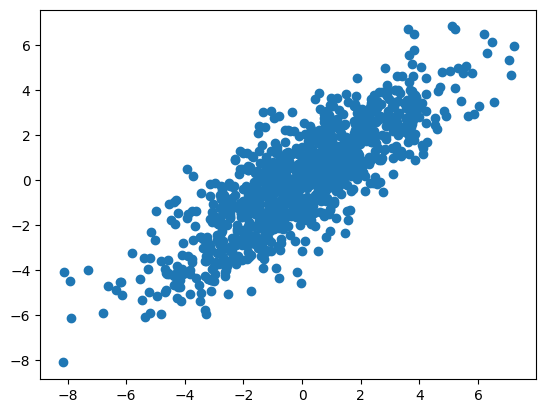

In [28]:
import numpy as np

angle = np.pi/4
R = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
diag_cov  = np.array([[10,0],[0,1]])
cov = R @ diag_cov @ R.T

Xs = np.random.multivariate_normal([0, 0], cov, 1000)
plt.scatter(Xs[:, 0], Xs[:, 1])

We have successfully created a dataset that is rotated and has a clear principal component. Let's see if we can find it by computing PCA by hand.

In [29]:
mean = np.mean(Xs, axis=0) # mean across data
centered_Xs = Xs - mean # fluctuations around mean
covariance = centered_Xs.T @ centered_Xs / len(Xs) # covariance matrix
print(centered_Xs.T.shape, centered_Xs.shape, covariance.shape)

(2, 1000) (1000, 2) (2, 2)


The princpal components are the eigenvectors of the covariance matrix. Let's study them.

In [30]:
evals, evecs = np.linalg.eig(covariance)
print(evals[0], evecs[:, 0])
print(evals[1], evecs[:, 1])

10.6591269976076 [0.71521548 0.69890401]
1.0048431996848468 [-0.69890401  0.71521548]


In [31]:
explained_variances = evals / np.sum(evals)
print(explained_variances)

[0.91385067 0.08614933]


This matches expectations because we see the (-1,-1) direction gets weight 10 and the (-1,1) direction gets weight 1. So the principal component is the (-1,-1) direction. The precisely matches what we would have expected from `R` and `diag_cov` above.

Let's make sure a pre-packaged library will give us the same thing.

In [32]:
# pca from sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Xs)
print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 0.71521548  0.69890401]
 [-0.69890401  0.71521548]]
[0.91385067 0.08614933]


We see that the explained variance and the principal components match what we computed by hand. Yes!